In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("C:\Supply Chain Analytics\Supply-Chain-Analysis-Capstone-Project-main\Supply-Chain-Analysis-Capstone-Project-main\supply_chain_data.csv")

In [4]:
data.head(5)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


## Data Preparation and cleaning

1. Load the file using pandas
2. Look at some infromation about the data & the columns
3. Fix any missing or incorrect values

In [5]:
data.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [6]:
data.shape

(100, 24)

In [7]:
data_test = data[['Price','Number of products sold','Order quantities']].describe()
data_test.round(2)

,Price,Number of products sold,Order quantities
count,100.00,100.00,100.00
mean,49.46,460.99,49.22
std,31.17,303.78,26.78
min,1.70,8.00,1.00
25%,19.60,184.25,26.00
50%,51.24,392.50,52.00
75%,77.20,704.25,71.25
max,99.17,996.00,96.00


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

## Checking Missing and Duplicate values

In [9]:
data.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [10]:
#Checking Duplicate Values
len(data[data.duplicated()])

0

In [11]:
#unique values for each column
data.nunique()

Product type                 3
SKU                        100
Price                      100
Availability                63
Number of products sold     96
Revenue generated          100
Customer demographics        4
Stock levels                65
Lead times                  29
Order quantities            61
Shipping times              10
Shipping carriers            3
Shipping costs             100
Supplier name                5
Location                     5
Lead time                   29
Production volumes          96
Manufacturing lead time     30
Manufacturing costs        100
Inspection results           3
Defect rates               100
Transportation modes         4
Routes                       3
Costs                      100
dtype: int64

## Data Visualisation

### Sales Analysis
Problem Statement :-
1. To Identify Which type of products are sold the most and Which type are sold the least .
2. To Identify sales of the products according to the customer demographics .
3. To Analyze which type of products have higher demand and ensuring that there stock levels are matched with their respective demand .

In [12]:
product_sold = data.groupby(['Product type'])[['Number of products sold', 'Revenue generated']].sum().reset_index()
data['Revenue generated'] = data['Revenue generated'].round(2)

In [13]:
product_sold

,Product type,Number of products sold,Revenue generated
0,cosmetics,11757,161521.265999
1,haircare,13611,174455.390605
2,skincare,20731,241628.162133


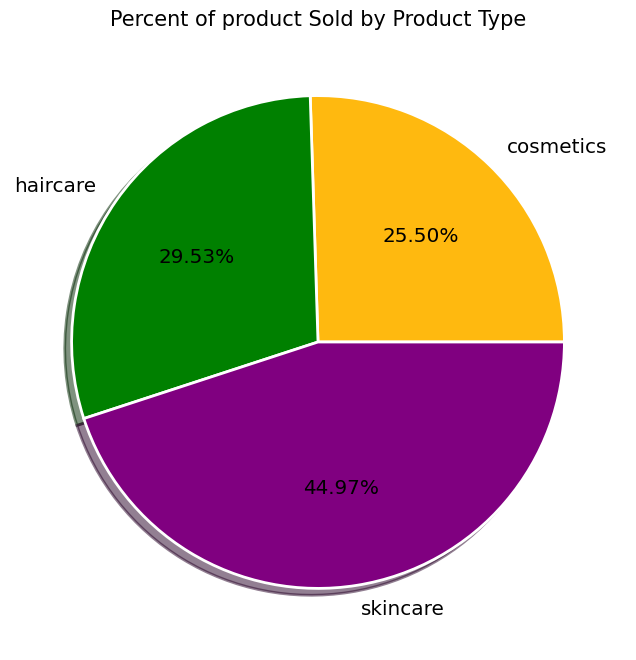

In [14]:
plt.figure(figsize = (8,8))
colors = ['#FFB90F', '#008000', '#800080']
pie_chart = plt.pie(product_sold['Number of products sold'], labels = product_sold['Product type'], autopct = '%.2f%%',wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'}, shadow =True, colors = colors)
plt.title('Percent of product Sold by Product Type', fontsize= 15)
plt.show()

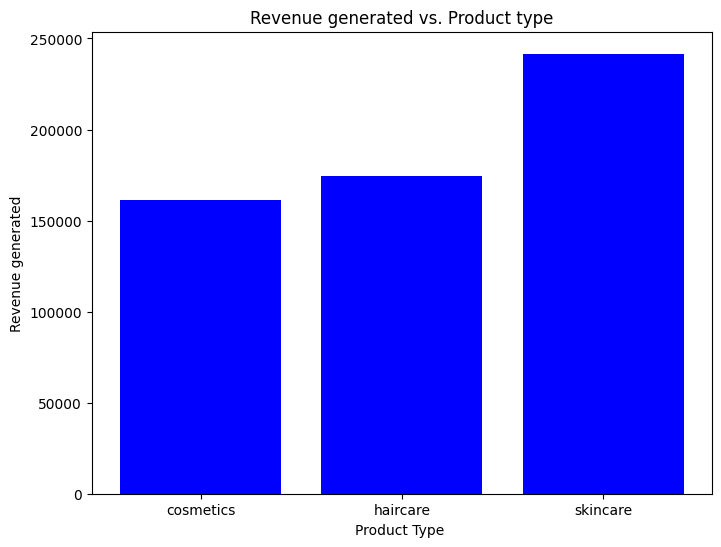

In [15]:
plt.figure(figsize = (8,6))
plt.bar(x = product_sold['Product type'], height = product_sold["Revenue generated"],color = 'blue')
plt.title("Revenue generated vs. Product type", fontsize = (12))
plt.xlabel("Product Type ")
plt.ylabel("Revenue generated")
plt.show()

##### So, the highest number of products sold are skincare products .
##### 45% of business comes from skincare, 29% from haircare, and 25% from cosmetics .
##### Most of the revenue comes from skincare products, followed by haircare, and then cosmetics products.

In [16]:
data['Customer demographics'].unique()

array(['Non-binary', 'Female', 'Unknown', 'Male'], dtype=object)

In [17]:
demographics = data.groupby(['Customer demographics', 'Product type'])['Number of products sold'].sum().reset_index()

In [18]:
demographics

,Customer demographics,Product type,Number of products sold
0,Female,cosmetics,4012
1,Female,haircare,936
2,Female,skincare,7853
3,Male,cosmetics,2304
4,Male,haircare,2292
5,Male,skincare,2911
6,Non-binary,cosmetics,2607
7,Non-binary,haircare,2820
8,Non-binary,skincare,5153
9,Unknown,cosmetics,2834


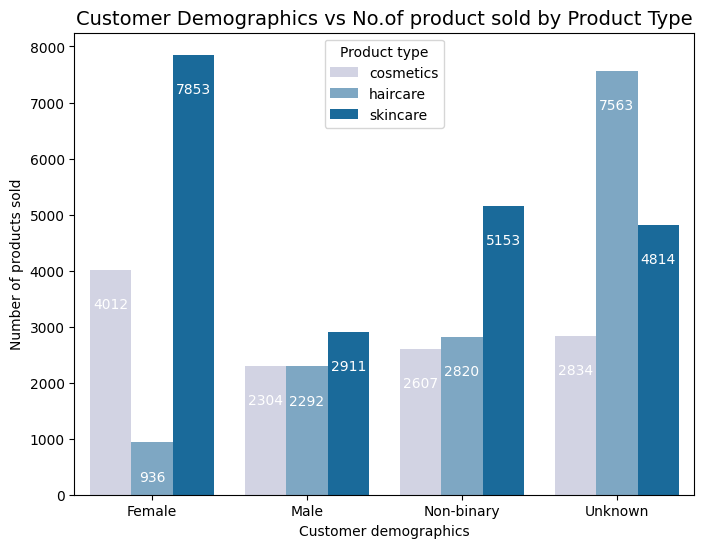

In [19]:
plt.figure(figsize = (8,6))
p = sns.barplot(x = demographics['Customer demographics'], y = demographics['Number of products sold'], hue = demographics['Product type'], palette = 'PuBu')
for container in p.containers:
    p.bar_label(container,padding= -30, color='white', fontsize=10)
plt.title("Customer Demographics vs No.of product sold by Product Type", fontsize = (14))
plt.show()

##### According to the graph, the female group purchases More skincare and cosmetic products , whereas the male group purchases all three products in the same manner and the unknown group category purchases more number of haircare products

##### Skin care products are the most popular among all four types of customers . So , Skincare products have a higher demand.

In [20]:
stock = data.groupby(['Product type'])[['Stock levels','Availability']].sum().reset_index()

In [21]:
stock

,Product type,Stock levels,Availability
0,cosmetics,1525,1332
1,haircare,1644,1471
2,skincare,1608,2037


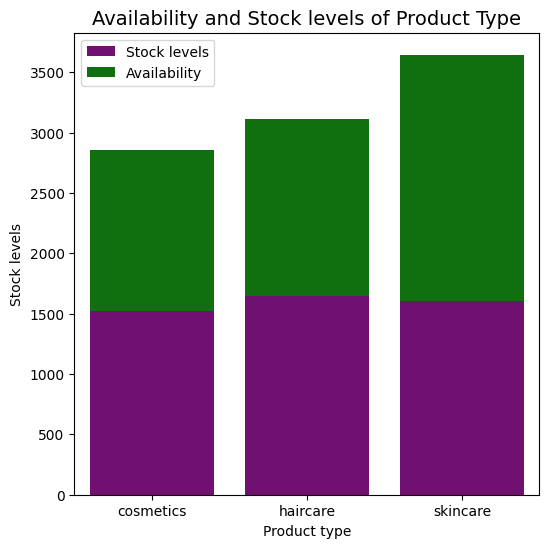

In [22]:
plt.figure(figsize=(6,6))
sns.barplot(x='Product type', y='Stock levels', data=stock, color='purple', label='Stock levels')
sns.barplot(x='Product type', y='Availability', data=stock, color='green', label='Availability', bottom=stock['Stock levels'])
plt.title("Availability and Stock levels of Product Type", fontsize=14)
plt.show()

####  skincare has a negative availability (1608 stocked units but 2037 are currently required), meaning an additional 429 units are in demand but not in stock. This suggests very high demand for skincare products.
#### Prioritize restocking skincare to meet the unmet demand and avoid losing customers.
#### Consider reducing the cosmetics and haircare stock to optimize inventory costs and free up capital for higher-demand products.

## Operations Analysis:
Problem Statement :-
1. To Analyze lead times, order quantities, and production volumes to optimize inventory management and reduce stockouts.
2. To Monitor inspection results and defect rates to identify quality issues and improve manufacturing and inspection processes.

In [23]:
data.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [24]:
product = data.groupby(['Product type'])[['Lead time', 'Order quantities', 'Production volumes']].mean().reset_index()
product['Order quantities'] = product['Order quantities'].round(2)
product['Lead time'] = product['Lead time'].round(2)
product['Production volumes'] = product['Production volumes'].round(2)

In [25]:
product

,Product type,Lead time,Order quantities,Production volumes
0,cosmetics,13.54,51.65,479.27
1,haircare,18.71,43.53,586.97
2,skincare,18.00,52.48,609.15


#### For skincare and haircare, reducing lead times could be a key opportunity for improving responsiveness and ensuring the ability to meet future demand more flexibly.
#### Skincare is the most in-demand product based on order quantities and production volumes. Ensure that you have sufficient stock and consider Reducing the Lead time .
#### Haircare has long lead times but good production volumes. Focus on improving supplier efficiency and boosting demand through marketing efforts.

In [26]:
rate = data.groupby(['Product type', 'Inspection results'])['Defect rates'].mean().reset_index()
rate['Defect rates'] = rate['Defect rates'].round(2)

In [27]:
rate

,Product type,Inspection results,Defect rates
0,cosmetics,Fail,2.19
1,cosmetics,Pass,1.82
2,cosmetics,Pending,1.71
3,haircare,Fail,2.53
4,haircare,Pass,2.92
5,haircare,Pending,2.27
6,skincare,Fail,2.90
7,skincare,Pass,1.68
8,skincare,Pending,2.33


In [28]:
data['Defect rates'].mean()

2.27715799273961

In [29]:
data['Defect rates'].max()

4.939255288620948

In [30]:
data['Defect rates'].min()

0.0186075676310149

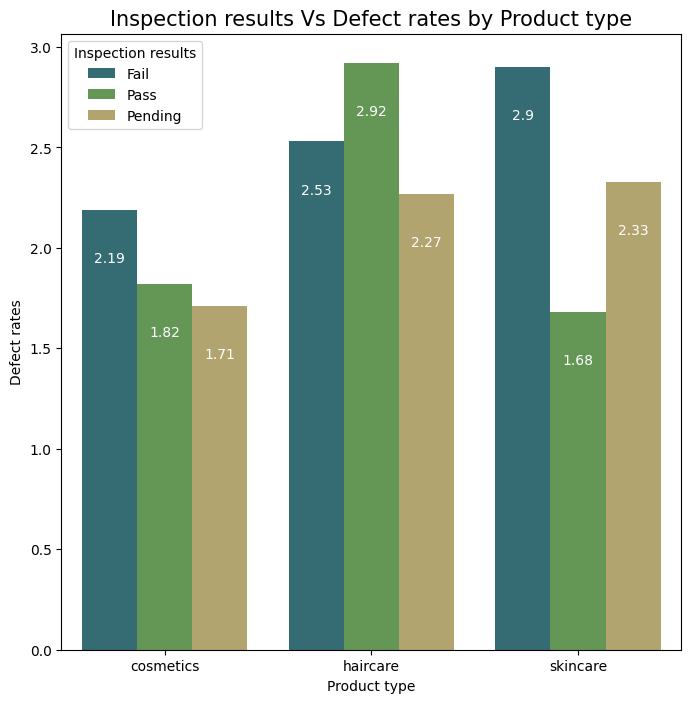

In [31]:
plt.figure(figsize = (8,8))
p = sns.barplot(x = rate['Product type'], y = rate['Defect rates'], hue = rate['Inspection results'], palette = 'gist_earth')
for container in p.containers:
    p.bar_label(container,padding=-40, color='white', fontsize=10)
    
plt.title("Inspection results Vs Defect rates by Product type", fontsize = (15))
plt.show()

#### Cosmetics products seem to have some quality issues, as the defect rates for failed and passed inspections are relatively close. Focus on quality improvement in the cosmetics line could help reduce defect rates and improve overall product performance.
#### The fact that passed haircare products have a higher defect rate than failed ones indicates an anomaly in the inspection process. This could be due to inconsistent quality checks or leniency in passing products that should have been flagged for defects. A thorough review of the inspection criteria for haircare products is needed.
#### 

## Shipping Analysis:
Problem Statement :-
To Find the Carrier generating Maximum Revenue and finding the ways (Routes , Modes of Transportation) to Ship that carrier with minimal cost in minimal Time .

In [32]:
shipping = data.groupby(['Shipping carriers'])['Shipping costs'].sum().reset_index()

In [33]:
shipping

,Shipping carriers,Shipping costs
0,Carrier A,155.537831
1,Carrier B,236.897620
2,Carrier C,162.379457


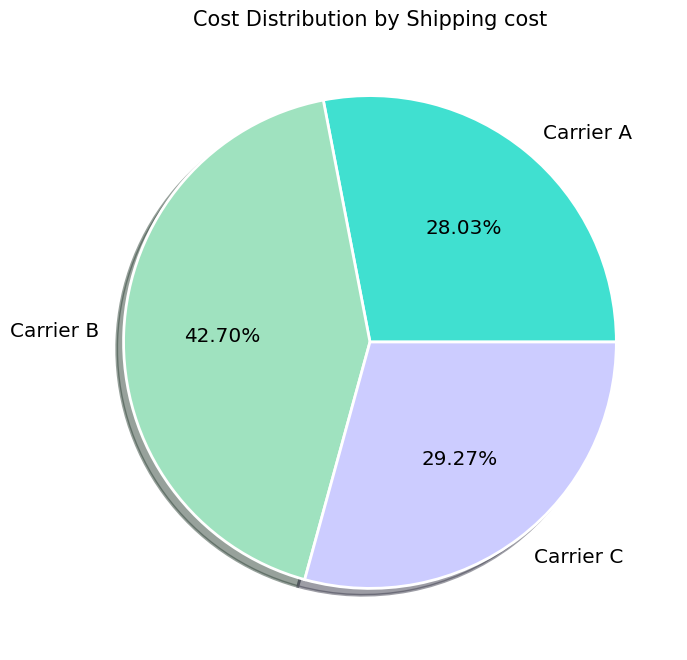

In [34]:
plt.figure(figsize = (12,8))
colors = ['#40E0D0', '#9FE2BF','#CCCCFF']
plt.pie( shipping['Shipping costs'], labels = shipping['Shipping carriers'],autopct = '%.2f%%', wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'}, shadow =True, colors = colors)
plt.title('Cost Distribution by Shipping cost', fontsize = (15))
plt.show()

In [36]:
carrier_revenue = data.groupby(['Shipping carriers'])['Revenue generated'].sum().reset_index()
carrier_revenue['Revenue generated'] = carrier_revenue['Revenue generated'].round(2)

In [37]:
carrier_revenue

,Shipping carriers,Revenue generated
0,Carrier A,142630.04
1,Carrier B,250094.64
2,Carrier C,184880.18


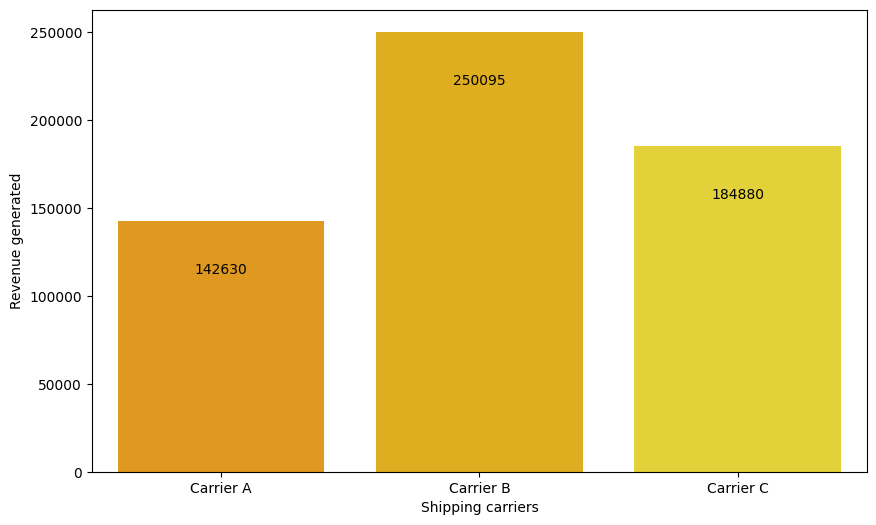

In [38]:
plt.figure(figsize = (10,6))
p = sns.barplot(x = carrier_revenue['Shipping carriers'], y = carrier_revenue['Revenue generated'], palette = 'Wistia_r')
for container in p.containers:
    p.bar_label(container,padding=-40, color='black', fontsize=10)

plt.show()

##### From the Above Observations , we can clearly say that Carrier B's Shipping cost is high but also The Revenue generated by it is also high .

In [39]:
transport = data.groupby(['Transportation modes', 'Routes'])['Costs'].sum().reset_index()

In [97]:
transport

,Transportation modes,Routes,Costs
0,Air,Route A,5800.887460
1,Air,Route B,4464.858025
2,Air,Route C,4338.782012
3,Rail,Route A,6790.710511
4,Rail,Route B,7007.410741
5,Rail,Route C,1370.810306
6,Road,Route A,5934.412107
7,Road,Route B,7181.085147
8,Road,Route C,2932.696386
9,Sea,Route A,2349.764416


In [41]:
shipping = data.groupby(['Shipping carriers', 'Transportation modes'])['Shipping times'].mean().reset_index()
shipping['Shipping times'] = shipping['Shipping times'].round(2)
shipping

,Shipping carriers,Transportation modes,Shipping times
0,Carrier A,Air,5.60
1,Carrier A,Rail,7.43
2,Carrier A,Road,5.18
3,Carrier A,Sea,7.00
4,Carrier B,Air,4.21
5,Carrier B,Rail,6.33
6,Carrier B,Road,4.91
7,Carrier B,Sea,6.67
8,Carrier C,Air,6.57
9,Carrier C,Rail,6.17


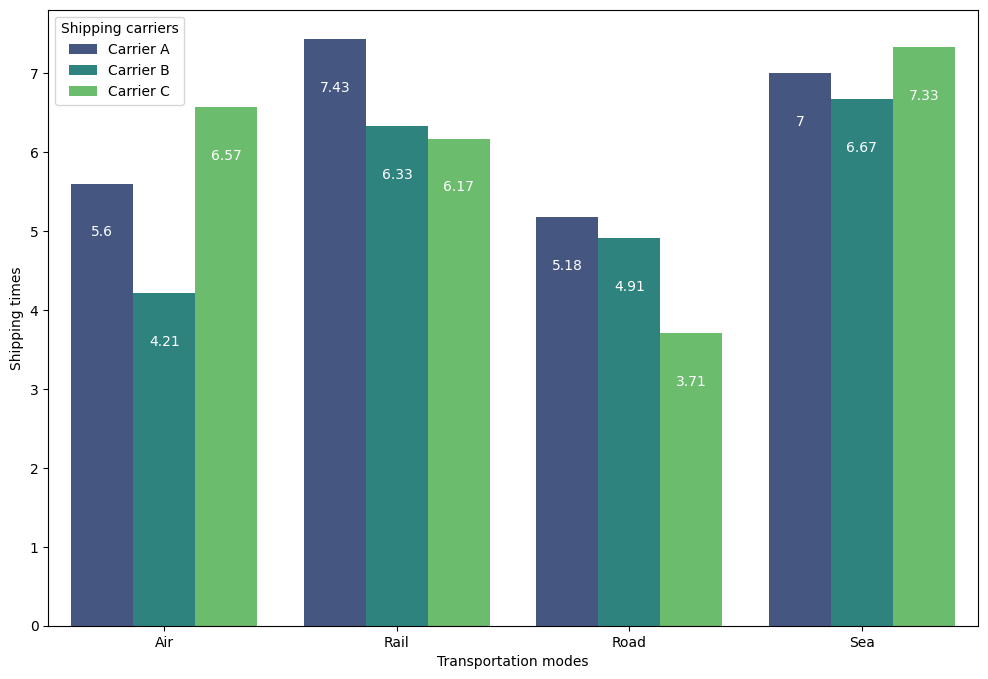

In [42]:
plt.figure(figsize = (12,8))
p = sns.barplot(x = shipping['Transportation modes'], y = shipping['Shipping times'], hue = shipping['Shipping carriers'], palette = 'viridis')
for container in p.containers:
    p.bar_label(container,padding=-40, color='white', fontsize=10)
plt.show()

#### According to the above Observation , Shipping Time for B (Carrier with highest revenue) is least in Air Transportation mode and to be even more cost effective Route 'C' Should be preferred . 